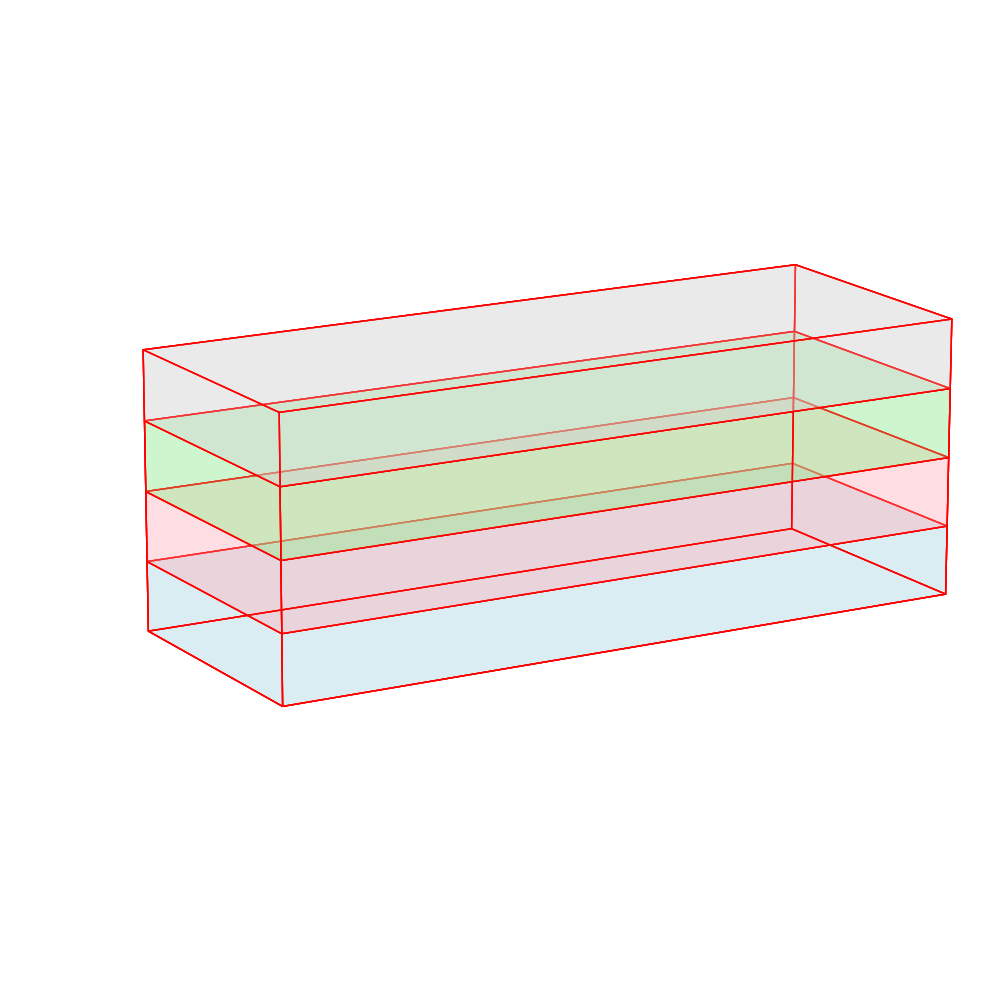

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.patches import Arrow
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(15,  10))
ax = fig.add_subplot(111, projection='3d')

# Dimensions of the rectangular prism
width = 1.5  # Updated width
height = 0.5
depth = 0.5

# Vertices of the rectangular prism
vertices = np.array([
    [0, 0, 0], [width, 0, 0], [width, height, 0], [0, height, 0],  # Bottom vertices
    [0, 0, depth], [width, 0, depth], [width, height, depth], [0, height, depth]  # Top vertices
])

# Generate the sides of the rectangular prism
faces = [
    [vertices[0], vertices[1], vertices[2], vertices[3]],  # Bottom face
    [vertices[4], vertices[5], vertices[6], vertices[7]],  # Top face
    [vertices[0], vertices[1], vertices[5], vertices[4]],  # Front face
    [vertices[2], vertices[3], vertices[7], vertices[6]],  # Back face
    [vertices[1], vertices[2], vertices[6], vertices[5]],  # Right face
    [vertices[0], vertices[3], vertices[7], vertices[4]]   # Left face
]

# Create a 3D polygon collection
prism = Poly3DCollection(faces, linewidths=1, edgecolors='r', alpha=0)
ax.add_collection3d(prism)

# Manually set the aspect ratio to make the plot appear proportional
ax.set_box_aspect([width, height, depth])  # This line helps in adjusting the visual aspect ratio

# Colors for the blocks, assuming you want different colors for visual distinction
block_colors = ['lightblue', 'lightpink', 'lightgreen', 'lightgrey']

# Depth positions for dividing planes, ensuring 4 blocks are distinctly colored
dividing_depths = [depth/4, depth/2, 3*depth/4]

# Function to add a colored block
def add_colored_block(ax, z_start, z_end, color):
    # Define vertices for the block, covering the full x and y range, between z_start and z_end
    vertices = [
        [[0, 0, z_start], [width, 0, z_start], [width, height, z_start], [0, height, z_start]],  # Bottom
        [[0, 0, z_end], [width, 0, z_end], [width, height, z_end], [0, height, z_end]],  # Top
        [[0, 0, z_start], [width, 0, z_start], [width, 0, z_end], [0, 0, z_end]],  # Front
        [[0, height, z_start], [width, height, z_start], [width, height, z_end], [0, height, z_end]],  # Back
        [[width, 0, z_start], [width, height, z_start], [width, height, z_end], [width, 0, z_end]],  # Right
        [[0, 0, z_start], [0, height, z_start], [0, height, z_end], [0, 0, z_end]]  # Left
    ]
    poly = Poly3DCollection(vertices, facecolors=color, linewidths=1, edgecolors='r', alpha=0.25)
    ax.add_collection3d(poly)

# Add blocks, alternating colors
for i, depth_position in enumerate(dividing_depths):
    color = block_colors[i]
    if i == 0:
        add_colored_block(ax, 0, depth_position, color)  # First block
    else:
        add_colored_block(ax, dividing_depths[i-1], depth_position, color)  # Subsequent blocks

# Add the last block, if necessary
if len(dividing_depths) > 0:
    add_colored_block(ax, dividing_depths[-1], depth, block_colors[-1])


# Adjust the axes to show only the min and max values, removing other numbers
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
ax.zaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=0)
ax.yaxis.set_tick_params(pad=0)
ax.zaxis.set_tick_params(pad=0)

# # Set the limits of the plot
ax.set_xlim([-.2, width])
ax.set_ylim([0, height])
ax.set_zlim([0, depth])

ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor((1.0, 1.0, 1.0, 0.0))
ax.yaxis.pane.set_edgecolor((1.0, 1.0, 1.0, 0.0))
ax.zaxis.pane.set_edgecolor((1.0, 1.0, 1.0, 0.0))

# Additionally, for the axis line color, set it to be transparent
ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

ax._axis3don = False

# Set labels
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
ax.invert_xaxis()

ax.view_init(elev=15, azim=60)



plt.tight_layout()

plt.savefig('dif_test.pdf', format='pdf', transparent=True)
plt.show()

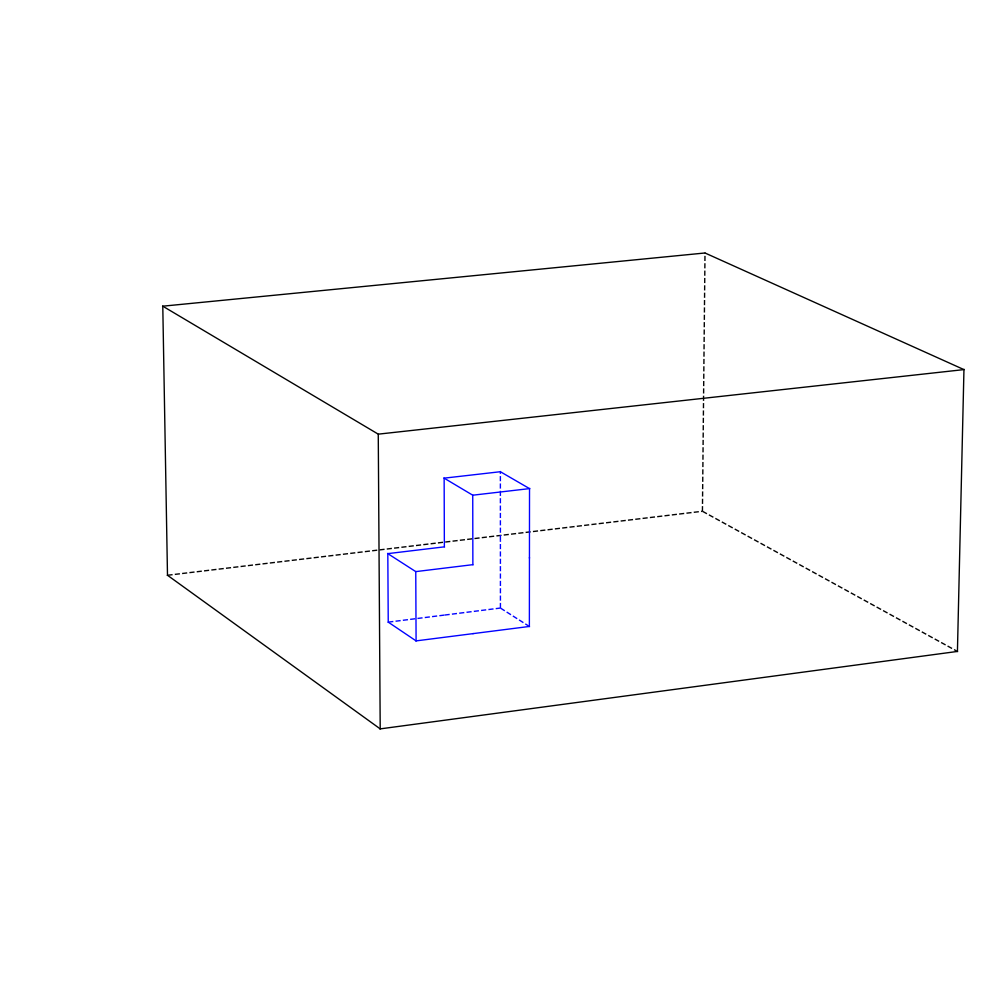

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.patches import Arrow
from mpl_toolkits.mplot3d import proj3d


fig = plt.figure(figsize=(15,  10))
ax = fig.add_subplot(111, projection='3d')

# Dimensions of the rectangular prism
width = 1.25  # Updated width
height = 1.0
depth = 0.5

# Vertices of the rectangular prism
vertices = np.array([
    [0, 0, 0], [width, 0, 0], [width, height, 0], [0, height, 0],  # Bottom vertices
    [0, 0, depth], [width, 0, depth], [width, height, depth], [0, height, depth]  # Top vertices
])

# Manually set the aspect ratio to make the plot appear proportional
ax.set_box_aspect([width, height, depth])  # This line helps in adjusting the visual aspect ratio

# Define all the edges
edges = [
    [vertices[0], vertices[1]],
    [vertices[1], vertices[2]],
    [vertices[2], vertices[3]],
    [vertices[3], vertices[0]],
    [vertices[4], vertices[5]],
    [vertices[5], vertices[6]],
    [vertices[6], vertices[7]],
    [vertices[7], vertices[4]],
    [vertices[0], vertices[4]],
    [vertices[1], vertices[5]],
    [vertices[2], vertices[6]],
    [vertices[3], vertices[7]]
]

# Define which edges are dashed (back edges in this case)
dashed_edges_indices = {0, 1, 9}

# Draw each edge
for i, edge in enumerate(edges):
    linestyle = '--' if i in dashed_edges_indices else '-'
    ax.plot3D(*zip(*edge), linestyle=linestyle, color='black', linewidth=1)




# New cube dimensions
c_width = 0.125
c_height = 0.125
c_depth = 0.125

# New position for the cube
posx = 0.29
posy = 0.4375
cz = 0  # Base height for positioning the cube

# Calculate vertices for the scaled and repositioned cube
new_cube_vertices = np.array([
    [posx, posy, cz],  # Bottom face vertices
    [posx + c_width, posy, cz],
    [posx + c_width, posy + c_height, cz],
    [posx, posy + c_height, cz],
    [posx, posy, cz + c_depth],  # Top face vertices
    [posx + c_width, posy, cz + c_depth],
    [posx + c_width, posy + c_height, cz + c_depth],
    [posx, posy + c_height, cz + c_depth],
])

# Draw edges for the scaled and repositioned cube
new_cube_edges = [
    [new_cube_vertices[0], new_cube_vertices[1]],
    # [new_cube_vertices[1], new_cube_vertices[2]],
    [new_cube_vertices[2], new_cube_vertices[3]],
    [new_cube_vertices[3], new_cube_vertices[0]],
    [new_cube_vertices[4], new_cube_vertices[5]],
    # [new_cube_vertices[5], new_cube_vertices[6]],
    [new_cube_vertices[6], new_cube_vertices[7]],
    [new_cube_vertices[7], new_cube_vertices[4]],
    [new_cube_vertices[0], new_cube_vertices[4]],
    # [new_cube_vertices[1], new_cube_vertices[5]],
    # [new_cube_vertices[2], new_cube_vertices[6]],
    [new_cube_vertices[3], new_cube_vertices[7]]
]
dashed = {0}

# # Draw edges for the new cube
for i,edge in enumerate(new_cube_edges):
    linestyle = '--' if i in dashed else '-'
    ax.plot3D(*zip(*edge), linestyle=linestyle, color='b', linewidth=1)



# New cube dimensions
c_width = 0.125
c_height = 0.125
c_depth = 0.125

# New position for the cube
posx = 0.29+0.125
posy = 0.4375
cz = 0  # Base height for positioning the cube

# Calculate vertices for the scaled and repositioned cube
new_cube_vertices = np.array([
    [posx, posy, cz],  # Bottom face vertices
    [posx + c_width, posy, cz],
    [posx + c_width, posy + c_height, cz],
    [posx, posy + c_height, cz],
    [posx, posy, cz + c_depth],  # Top face vertices
    [posx + c_width, posy, cz + c_depth],
    [posx + c_width, posy + c_height, cz + c_depth],
    [posx, posy + c_height, cz + c_depth],
])

# Draw edges for the scaled and repositioned cube
new_cube_edges = [
    [new_cube_vertices[0], new_cube_vertices[1]],
    [new_cube_vertices[1], new_cube_vertices[2]],
    [new_cube_vertices[2], new_cube_vertices[3]],
    # [new_cube_vertices[3], new_cube_vertices[0]],
    # [new_cube_vertices[4], new_cube_vertices[5]],
    # [new_cube_vertices[5], new_cube_vertices[6]],
    # [new_cube_vertices[6], new_cube_vertices[7]],
    # [new_cube_vertices[7], new_cube_vertices[4]],
    # [new_cube_vertices[0], new_cube_vertices[4]],
    [new_cube_vertices[1], new_cube_vertices[5]],
    [new_cube_vertices[2], new_cube_vertices[6]],
    # [new_cube_vertices[3], new_cube_vertices[7]]
]
dashed = {
    0,1,3
}

# # Draw edges for the new cube
for i,edge in enumerate(new_cube_edges):
    linestyle = '--' if i in dashed else '-'
    ax.plot3D(*zip(*edge), linestyle=linestyle, color='b', linewidth=1)


# New cube dimensions
c_width = 0.125
c_height = 0.125
c_depth = 0.125

# New position for the cube
posx = 0.29+0.125
posy = 0.4375
cz = 0.125  # Base height for positioning the cube

# Calculate vertices for the scaled and repositioned cube
new_cube_vertices = np.array([
    [posx, posy, cz],  # Bottom face vertices
    [posx + c_width, posy, cz],
    [posx + c_width, posy + c_height, cz],
    [posx, posy + c_height, cz],
    [posx, posy, cz + c_depth],  # Top face vertices
    [posx + c_width, posy, cz + c_depth],
    [posx + c_width, posy + c_height, cz + c_depth],
    [posx, posy + c_height, cz + c_depth],
])

# Draw edges for the scaled and repositioned cube
new_cube_edges = [
    # [new_cube_vertices[0], new_cube_vertices[1]],
    # [new_cube_vertices[1], new_cube_vertices[2]],
    # [new_cube_vertices[2], new_cube_vertices[3]],
    # [new_cube_vertices[3], new_cube_vertices[0]],
    [new_cube_vertices[4], new_cube_vertices[5]],
    [new_cube_vertices[5], new_cube_vertices[6]],
    [new_cube_vertices[6], new_cube_vertices[7]],
    [new_cube_vertices[7], new_cube_vertices[4]],
    [new_cube_vertices[0], new_cube_vertices[4]],
    [new_cube_vertices[1], new_cube_vertices[5]],
    [new_cube_vertices[2], new_cube_vertices[6]],
    [new_cube_vertices[3], new_cube_vertices[7]]
]
dashed = {5}
# # Draw edges for the new cube
for i, edge in enumerate(new_cube_edges):
    linestyle = '--' if i in dashed else '-'
    ax.plot3D(*zip(*edge), linestyle=linestyle, color='b', linewidth=1)



# # Manually set the aspect ratio to include the new cube in view
# ax.set_box_aspect([np.ptp(new_cube_vertices[:,0]), np.ptp(new_cube_vertices[:,1]), np.ptp(new_cube_vertices[:,2])])





# Adjust the axes to show only the min and max values, removing other numbers
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
ax.zaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=0)
ax.yaxis.set_tick_params(pad=0)
ax.zaxis.set_tick_params(pad=0)

# # Set the limits of the plot
ax.set_xlim([-.2, width])
ax.set_ylim([0, height])
ax.set_zlim([0, depth])

ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor((1.0, 1.0, 1.0, 0.0))
ax.yaxis.pane.set_edgecolor((1.0, 1.0, 1.0, 0.0))
ax.zaxis.pane.set_edgecolor((1.0, 1.0, 1.0, 0.0))

# Additionally, for the axis line color, set it to be transparent
ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

ax._axis3don = False




# Set labels
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
ax.invert_xaxis()

ax.view_init(elev=15, azim=66)

plt.tight_layout()


plt.savefig('CUBI_domain.pdf', format='pdf', transparent=True)
plt.show()

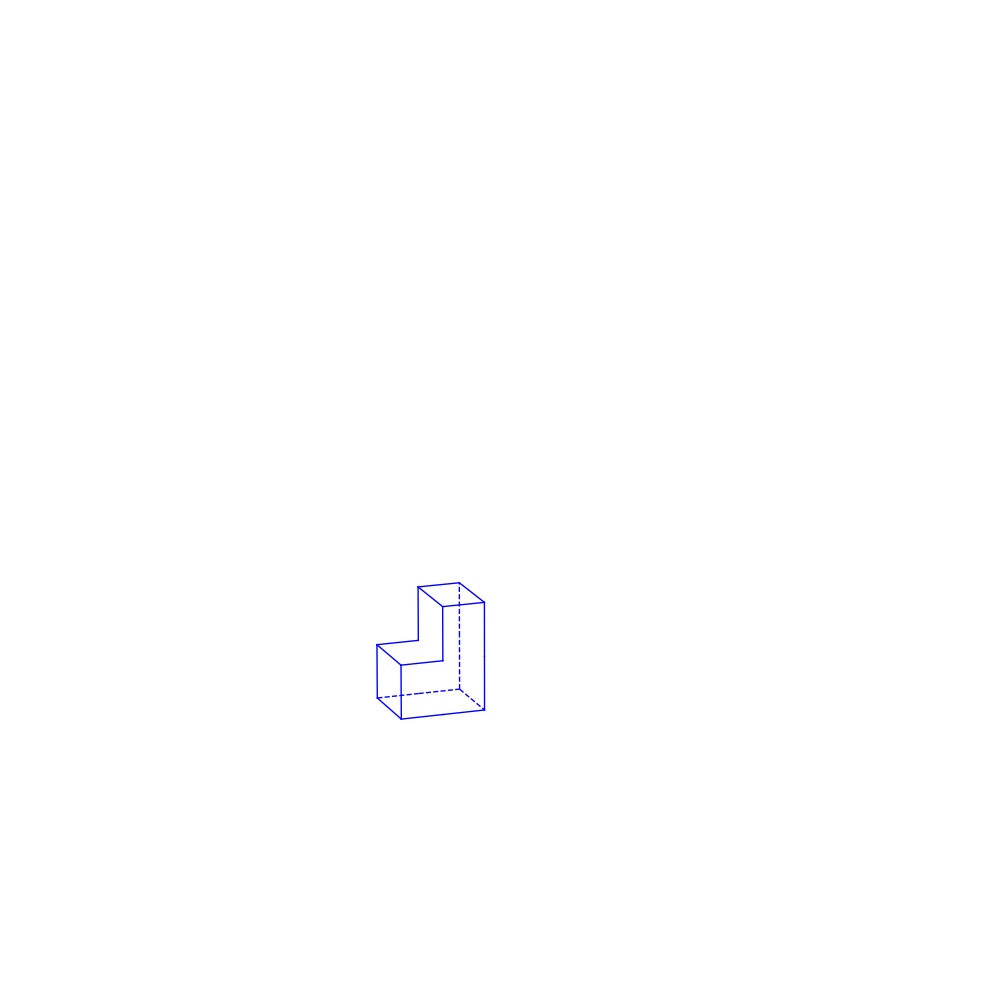

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.patches import Arrow
from mpl_toolkits.mplot3d import proj3d


fig = plt.figure(figsize=(15,  10))
ax = fig.add_subplot(111, projection='3d')


# New cube dimensions
c_width = 0.125
c_height = 0.125
c_depth = 0.125

# New position for the cube
posx = 0.29
posy = 0.4375
cz = 0  # Base height for positioning the cube

# Calculate vertices for the scaled and repositioned cube
new_cube_vertices = np.array([
    [posx, posy, cz],  # Bottom face vertices
    [posx + c_width, posy, cz],
    [posx + c_width, posy + c_height, cz],
    [posx, posy + c_height, cz],
    [posx, posy, cz + c_depth],  # Top face vertices
    [posx + c_width, posy, cz + c_depth],
    [posx + c_width, posy + c_height, cz + c_depth],
    [posx, posy + c_height, cz + c_depth],
])

# Draw edges for the scaled and repositioned cube
new_cube_edges = [
    [new_cube_vertices[0], new_cube_vertices[1]],
    # [new_cube_vertices[1], new_cube_vertices[2]],
    [new_cube_vertices[2], new_cube_vertices[3]],
    [new_cube_vertices[3], new_cube_vertices[0]],
    [new_cube_vertices[4], new_cube_vertices[5]],
    # [new_cube_vertices[5], new_cube_vertices[6]],
    [new_cube_vertices[6], new_cube_vertices[7]],
    [new_cube_vertices[7], new_cube_vertices[4]],
    [new_cube_vertices[0], new_cube_vertices[4]],
    # [new_cube_vertices[1], new_cube_vertices[5]],
    # [new_cube_vertices[2], new_cube_vertices[6]],
    [new_cube_vertices[3], new_cube_vertices[7]]
]
dashed = {0}

# # Draw edges for the new cube
for i,edge in enumerate(new_cube_edges):
    linestyle = '--' if i in dashed else '-'
    ax.plot3D(*zip(*edge), linestyle=linestyle, color='b', linewidth=1)



# New cube dimensions
c_width = 0.125
c_height = 0.125
c_depth = 0.125

# New position for the cube
posx = 0.29+0.125
posy = 0.4375
cz = 0  # Base height for positioning the cube

# Calculate vertices for the scaled and repositioned cube
new_cube_vertices = np.array([
    [posx, posy, cz],  # Bottom face vertices
    [posx + c_width, posy, cz],
    [posx + c_width, posy + c_height, cz],
    [posx, posy + c_height, cz],
    [posx, posy, cz + c_depth],  # Top face vertices
    [posx + c_width, posy, cz + c_depth],
    [posx + c_width, posy + c_height, cz + c_depth],
    [posx, posy + c_height, cz + c_depth],
])

# Draw edges for the scaled and repositioned cube
new_cube_edges = [
    [new_cube_vertices[0], new_cube_vertices[1]],
    [new_cube_vertices[1], new_cube_vertices[2]],
    [new_cube_vertices[2], new_cube_vertices[3]],
    # [new_cube_vertices[3], new_cube_vertices[0]],
    # [new_cube_vertices[4], new_cube_vertices[5]],
    # [new_cube_vertices[5], new_cube_vertices[6]],
    # [new_cube_vertices[6], new_cube_vertices[7]],
    # [new_cube_vertices[7], new_cube_vertices[4]],
    # [new_cube_vertices[0], new_cube_vertices[4]],
    [new_cube_vertices[1], new_cube_vertices[5]],
    [new_cube_vertices[2], new_cube_vertices[6]],
    # [new_cube_vertices[3], new_cube_vertices[7]]
]
dashed = {
    0,1,3
}

# # Draw edges for the new cube
for i,edge in enumerate(new_cube_edges):
    linestyle = '--' if i in dashed else '-'
    ax.plot3D(*zip(*edge), linestyle=linestyle, color='b', linewidth=1)


# New cube dimensions
c_width = 0.125
c_height = 0.125
c_depth = 0.125

# New position for the cube
posx = 0.29+0.125
posy = 0.4375
cz = 0.125  # Base height for positioning the cube

# Calculate vertices for the scaled and repositioned cube
new_cube_vertices = np.array([
    [posx, posy, cz],  # Bottom face vertices
    [posx + c_width, posy, cz],
    [posx + c_width, posy + c_height, cz],
    [posx, posy + c_height, cz],
    [posx, posy, cz + c_depth],  # Top face vertices
    [posx + c_width, posy, cz + c_depth],
    [posx + c_width, posy + c_height, cz + c_depth],
    [posx, posy + c_height, cz + c_depth],
])

# Draw edges for the scaled and repositioned cube
new_cube_edges = [
    # [new_cube_vertices[0], new_cube_vertices[1]],
    # [new_cube_vertices[1], new_cube_vertices[2]],
    # [new_cube_vertices[2], new_cube_vertices[3]],
    # [new_cube_vertices[3], new_cube_vertices[0]],
    [new_cube_vertices[4], new_cube_vertices[5]],
    [new_cube_vertices[5], new_cube_vertices[6]],
    [new_cube_vertices[6], new_cube_vertices[7]],
    [new_cube_vertices[7], new_cube_vertices[4]],
    [new_cube_vertices[0], new_cube_vertices[4]],
    [new_cube_vertices[1], new_cube_vertices[5]],
    [new_cube_vertices[2], new_cube_vertices[6]],
    [new_cube_vertices[3], new_cube_vertices[7]]
]
dashed = {5}
# # Draw edges for the new cube
for i, edge in enumerate(new_cube_edges):
    linestyle = '--' if i in dashed else '-'
    ax.plot3D(*zip(*edge), linestyle=linestyle, color='b', linewidth=1)



# # Manually set the aspect ratio to include the new cube in view
# ax.set_box_aspect([np.ptp(new_cube_vertices[:,0]), np.ptp(new_cube_vertices[:,1]), np.ptp(new_cube_vertices[:,2])])





# Adjust the axes to show only the min and max values, removing other numbers
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
ax.zaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=0)
ax.yaxis.set_tick_params(pad=0)
ax.zaxis.set_tick_params(pad=0)

# # Set the limits of the plot
ax.set_xlim([-.2, width])
ax.set_ylim([0, height])
ax.set_zlim([0, depth])

ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor((1.0, 1.0, 1.0, 0.0))
ax.yaxis.pane.set_edgecolor((1.0, 1.0, 1.0, 0.0))
ax.zaxis.pane.set_edgecolor((1.0, 1.0, 1.0, 0.0))

# Additionally, for the axis line color, set it to be transparent
ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

ax._axis3don = False

ax.invert_xaxis()

ax.view_init(elev=15, azim=70)

plt.tight_layout()


plt.savefig('CUBI.pdf', format='pdf', transparent=True)
plt.show()

In [9]:
from mayavi import mlab
import numpy as np

# Set the dimensions of the volume
width, height, depth = 3.0, 3.0, 3.0

# Set the colors for the blocks, assuming you want different colors for visual distinction
# Mayavi expects colors to be a tuple of (R, G, B) with values between 0 and 1
block_colors = [(0.678, 0.847, 0.902),  # lightblue
                (1.0, 0.753, 0.796),    # lightpink
                (0.565, 0.933, 0.565),  # lightgreen
                (0.827, 0.827, 0.827)]  # lightgrey

# Set the depth positions for dividing planes, ensuring 4 blocks are distinctly colored
dividing_depths = [depth/4, depth/2, 3*depth/4]

# Function to add a colored block
def add_colored_block(z_start, z_end, color):
    # Generate the grid of points for each face of the block
    x = np.array([[0, width, width, 0], [0, width, width, 0]])
    y = np.array([[0, 0, height, height], [0, 0, height, height]])
    z = np.array([[z_start, z_start, z_start, z_start], [z_end, z_end, z_end, z_end]])
    
    # Draw the sides
    mlab.mesh(x, y, z, color=color)
    mlab.mesh(y, z, x, color=color)
    mlab.mesh(z, x, y, color=color)

# Create a figure with a white background
mlab.figure(bgcolor=(1, 1, 1))

# Add blocks with alternating colors
for i, z_current in enumerate([0] + dividing_depths):
    if i == 0:
        z_previous = 0
    else:
        z_previous = dividing_depths[i-1]
    color = block_colors[i % len(block_colors)]
    add_colored_block(z_previous, z_current, color)

# Add the last block
if len(dividing_depths) > 0:
    add_colored_block(dividing_depths[-1], depth, block_colors[-1])

mlab.orientation_axes()
mlab.show()


In [94]:
import cv2
import numpy as np

# Load the image
image_path = 'VTKs/Vtk_test.png'
image = cv2.imread(image_path)

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to get the white regions (stripes)
_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

# Find the contours of the white regions
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours from left to right
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

# Widths of the white stripes
white_widths = []

# Calculate the width of the white regions
for ctr in contours:
    x, y, w, h = cv2.boundingRect(ctr)
    white_widths.append(w)

# Total width to shift
shift_width = sum(white_widths)

# New image with the same size as the original, filled with blue (background color)
new_image = np.full_like(image, (255, 0, 0))

# Start copying from the leftmost part
current_x = 0

for i, ctr in enumerate(contours):
    # Get the bounding box of the white region
    x, y, w, h = cv2.boundingRect(ctr)
    # Calculate the width of the domain to the left of the white region
    domain_width = x if i == 0 else x - sum(white_widths[:i])
    # Copy the domain to the new image
    new_image[:, current_x:current_x + domain_width] = image[:, sum(white_widths[:i]):x]
    # Update the current x position
    current_x += domain_width

# Save the manipulated image
cv2.imwrite('VTKs/VTK_updated.png', new_image)


True

In [380]:
from PIL import Image

def select_transparent_areas(image_path, output_path, transparency_threshold=100):
    image = Image.open(image_path)
    image = image.convert("RGBA")  # Ensure image is in RGBA format for transparency
    
    # Get the alpha band
    alpha_band = image.split()[3]

    # Create a new image for the output with the same size as the original
    selected_area_image = Image.new("RGBA", image.size, (0, 0, 0, 0))  # Fully transparent

    # Load pixel data
    alpha_data = alpha_band.getdata()
    selected_area_data = []

    # Check each pixel's alpha value
    for pixel in alpha_data:
        if pixel <= transparency_threshold:
            selected_area_data.append((255, 255, 255, 255))  # Make transparent areas white and fully opaque
        else:
            selected_area_data.append((0, 0, 0, 0))  # Keep the rest fully transparent



    # Update the selected area image with the new data
    selected_area_image.putdata(selected_area_data)
    
    # Save the output image
    selected_area_image.save(output_path)


def count_pixels_between_blocks(image_path):
    # Load the image
    image = Image.open(image_path)
    pixels = image.load()

    # Assuming the image is in grayscale, we'll be looking for white or light pixels
    # that define the gaps between the blocks. If the image is in color, the logic
    # might need to be adjusted to account for the specific color of the gaps.
    
    # Get the size of the image
    width, height = image.size

    
    # Initialize variables to keep track of the counting process
    gap_widths = []
    in_gap = False
    current_gap_width = 0

    # Iterate over the columns of the image
    for x in range(width):

        pixel = pixels[x, height/2]
        
        if pixel[0] > 200 and pixel[1] > 200 and pixel[2] > 200:
            if not in_gap:
                in_gap = True
                current_gap_width = 1
            else:
                current_gap_width += 1
        else:
            if in_gap:
                # We've found the end of a gap, add its width to the list
                gap_widths.append(current_gap_width)
                in_gap = False
                current_gap_width = 0

    # Handle the last gap if the image ends with a gap
    if in_gap:
        gap_widths.append(current_gap_width)

    return gap_widths

def get_pixel_color(image, x, y):
    pixels = image.load()  # Load the pixel data
    return pixels[x, y]    # Return the color of the pixel at (x, y)

def count_twos(array):
    return array.count(2)


def get_x_space_indices(image_path):
    image = Image.open(image_path)
    pixels = image.load()

    colored = 0
    x_spaces = []
    for x in range(width):
        pixel = pixels[x, height/2]
        if (pixel[0] == 0 and pixel[1]== 0 and pixel[2] == 0 and pixel[3] == 0) or pixel[3] < 100:
            # print(x)
            colored += 1
        else:
            if colored != 0:
                # print(colored, x)
                if colored < 10:
                    for i in reversed(range(colored)_:
                        # print(i)    
                        x_spaces.append(x-i-1)
                    # print(x_spaces)
                colored = 0  
    # for i in range(len(x_spaces)):
    #     print(get_pixel_color(image, x_spaces[i], height/2))
    return x_spaces

[210, 2, 2, 2, 210]
1578 786
1578 786
772 779
[498, 499, 788, 789, 1078, 1079]
[210, 2, 2, 2, 210]
6


<Figure size 2000x1500 with 0 Axes>

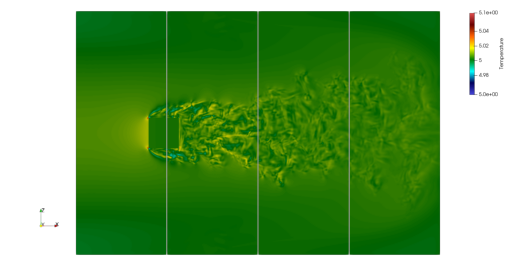

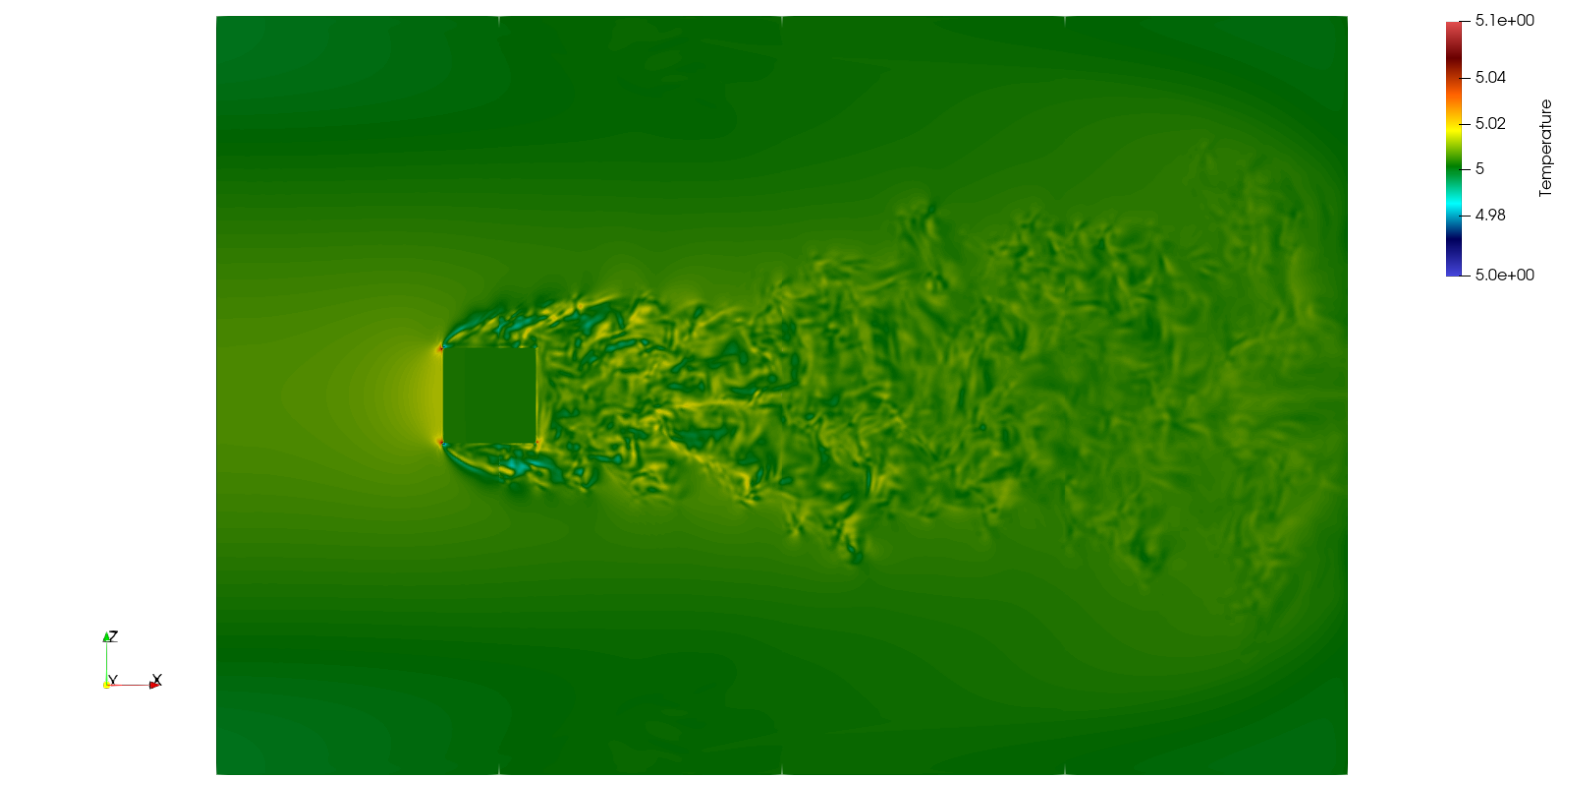

<Figure size 2000x1500 with 0 Axes>

In [452]:
import matplotlib.pyplot as plt
from IPython.display import display, Image
from PIL import Image

image_path = 'VTKs/Vtk_test.png'  # Path to the original image
output_path = 'VTKs/VTK_updated.png'  # Path for the adjusted image
select_transparent_areas(image_path, output_path)

gap_widths = count_pixels_between_blocks(output_path)
print(gap_widths)

# print(count_twos(gap_widths))

image = Image.open(image_path)
pixels = image.load()

width, height = image.size
print(width, height)


def find_height_of_domain(x):
    colored = 0
    y_start = 0
    y_end = 0
    for y in range(height):
        pixel = pixels[x, y]
        
        if (pixel[0] != 0 and pixel[1] != 0 and pixel[2] != 0 and pixel[3] != 0) or pixel[3] > 100:
            colored += 1
        else:
            if colored != 0:
                print(colored, y)
                if colored > 100:
                    y_start = y-colored
                    y_end = y
                    return (y_start, y_end-1)
                else:
                    colored = 0
            
# print(get_pixel_color(image, gap_widths[0]+2, find_height_of_domain(gap_widths[0] + 2)[1]))


def create_updated_image(image_path, output_path, spaces):
    image = Image.open(image_path)
    image = image.convert("RGBA")  # Ensure image is in RGBA format for transparency
    
    width, height = image.size
    print(width, height)
    
    alpha_band = image.split()[3]

    # Create a new image for the output with the same size as the original
    selected_area_image = Image.new("RGBA", image.size, (0, 0, 0, 0))  # Fully transparent

    # Load pixel data
    alpha_data = alpha_band.getdata()
    selected_area_data = []

    y_start, y_end = find_height_of_domain(spaces[0] + 2)
    x_spaces = get_x_space_indices(image_path)
    print(x_spaces)
    print(spaces)
    # print( spaces[x_spaces.index(328)+1] )
    
    
    print(sum(i for i in spaces if i < 10))

    # for y in range(height):
    #     shift = 0
    #     shifted = 0
    #     for x in range(width):
    #         # print(shifted)
    #         if x in x_spaces and shifted != 1:
    #             shift += 1
    #             if y in range(y_start, y_end):
    #                     # print(shift)
    #                 if x <= x_spaces[len(x_spaces)-1]:
    #                     if x+shift in x_spaces:
    #                         if x+shift+1 in x_spaces:
    #                             shift +=2
    #                             selected_area_data.append(image.getpixel((x+shift,y)))
    #                         else:
    #                             shift +=1
    #                             selected_area_data.append(image.getpixel((x+shift,y)))
    #                 # else: 
    #                     # selected_area_data.append(image.getpixel((x,y)))
    #             else:
    #                 pixel = image.getpixel((x, y))
    #                 selected_area_data.append(pixel)  # Keep the rest fully transparent
    #             # shifted = 1
    #         else:
    #             # if y in range(y_start, y_end):
    #             #     if x <= x_spaces[len(x_spaces)-1]:
    #             #         selected_area_data.append(image.getpixel((x+shift,y)))
    #             #     else: 
    #             #         # if x > width-spaces[len(spaces)-1] and x > width-21:
    #             #         selected_area_data.append(image.getpixel((x,y)))
    #             # else: 
    #                 selected_area_data.append(image.getpixel((x,y)))
    for y in range(height):
        shift = 0
        for x in range(width):
            if x in range(width-spaces[len(spaces)-1]):
                target_x = x + shift  # Calculate target x considering current shift

                if target_x in x_spaces and y in range(y_start-1, y_end+1+2):
                    # Increase shift if we're within a space and within the vertical range
                    while target_x in x_spaces:
                        shift += 1
                        target_x = x + shift  # Update target x based on new shift
                        # if x == 816:
                        #     print(f"Updated: x={x}, shift={shift}, target_x={target_x}, in x_spaces={target_x in x_spaces}")  # Debugging
                    # Ensure we don't go out of bounds after shifting
                    if target_x < width:
                        selected_area_data.append(image.getpixel((target_x, y)))
                    else:
                        # If out of bounds, append a default pixel or skip
                        selected_area_data.append((0, 0, 0, 0))  # Example: appending a transparent pixel
                elif y in range(y_start, y_end+1):
                    if target_x < width:
                        selected_area_data.append(image.getpixel((target_x, y)))
                
                else:
                    # Directly append the pixel if not shifting
                    if x < width:
                        selected_area_data.append(image.getpixel((x, y)))
            else:
                selected_area_data.append(image.getpixel((x, y)))

    # Update the selected area image with the new data
    selected_area_image.putdata(selected_area_data)
    
    # Save the output image
    selected_area_image.save(output_path)

create_updated_image(image_path, output_path, gap_widths)

# print(get_pixel_color(image, 328, height/2))

image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')  # Optional: to hide the axis
plt.figure(figsize=(20, 15))


image = Image.open(output_path)
plt.imshow(image)
plt.axis('off')  # Optional: to hide the axis
plt.figure(figsize=(20, 15))
